# Detección de strawberries

link del dataset: https://universe.roboflow.com/saruta-nonthasiriwat-sr2y9/strawberry-tyqqb/dataset/2

Link interesante, datos de paga:  https://www.kaggle.com/datasets/trainingdatapro/ripe-strawberries-detection/data

Mas imagenes, no revisadas: https://universe.roboflow.com/cs2/farm-detect9/dataset/3

In [ ]:
# Uso de la API de roboflow
#%pip install roboflow --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.9 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## Descargar el dataset


In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="42Nw8TCWU49wkIb2yAce")
project = rf.workspace("leonrosas").project("manzanas-qnxhi")
version = project.version(2)
dataset = version.download("yolov5")





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Manzanas-2 in yolov5pytorch:: 100%|██████████| 556/556 [00:00<00:00, 9007.33it/s]


## Visualización de los datos

In [2]:
# Codigo utilizable como libreria
import os
import yaml
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import shutil

def load_yaml_config(yaml_path):
    """
    Carga un archivo de configuración YAML.

    Args:
        yaml_path (str): Ruta al archivo YAML.

    Returns:
        dict: Contenido del YAML parseado.
    """
    with open(yaml_path, 'r') as file:
        return yaml.safe_load(file)

def count_classes(labels_dir):
    """
    Cuenta las ocurrencias de cada clase en los archivos de etiquetas de un directorio dado.

    Args:
        labels_dir (str): Ruta al directorio que contiene los archivos de etiquetas.

    Returns:
        Counter: Un objeto Counter con los conteos de clases.
    """
    class_counter = Counter()
    for label_file in os.listdir(labels_dir):
        if label_file.endswith('.txt'):
            with open(os.path.join(labels_dir, label_file), 'r') as file:
                for line in file:
                    class_id = int(line.split()[0])
                    class_counter[class_id] += 1
    return class_counter

def analyze_class_balance(config_path):
    """
    Analiza el balance de clases en el conjunto de datos según lo especificado en el archivo de configuración.

    Args:
        config_path (str): Ruta al archivo de configuración YAML.

    Returns:
        pd.DataFrame: DataFrame que contiene los conteos de clases para cada división del conjunto de datos.
    """
    config = load_yaml_config(config_path)
    classes = config['names']
    datasets = ['train', 'valid', 'test']
    base_dir = os.path.dirname(config_path)

    results = {}
    for dataset in datasets:
        labels_dir = os.path.join(base_dir, dataset, 'labels')
        if os.path.exists(labels_dir):
            results[dataset] = count_classes(labels_dir)
        else:
            print(f"Advertencia: El directorio '{labels_dir}' no existe. Saltando el conjunto de datos {dataset}.")
            results[dataset] = Counter()

    # Creación del DataFrame
    df = pd.DataFrame({dataset: [results[dataset].get(i, 0) for i in range(len(classes))] for dataset in datasets}, index=classes)

    return df


def plot_class_balance(df):
    """
    Genera un gráfico de barras para visualizar el balance de clases en los diferentes conjuntos de datos.

    Args:
        df (pd.DataFrame): DataFrame que contiene los conteos de clases para cada división del conjunto de datos.
    """
    ax = df.plot(kind='bar', figsize=(10, 6), width=0.8)
    plt.title('Balance de Clases en los Conjuntos de Datos')
    plt.xlabel('Clases')
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)
    plt.legend(title='Conjuntos de Datos')
    plt.tight_layout()
    plt.show()


def remove_directory_if_exists(directory_path):
    """
    Elimina un directorio si existe.

    Args:
        directory_path (str): La ruta del directorio a eliminar.
    """
    if os.path.exists(directory_path):
        shutil.rmtree(directory_path)
        print(f"Directorio '{directory_path}' eliminado exitosamente.")
    else:
        print(f"Directorio '{directory_path}' no existe.")

**NOTA: Es necesario que el dataset se encuentre en el siguiente formato.**


```plaintext
strawberry-2
├── test
├── train
├── valid
└── data.yaml
```



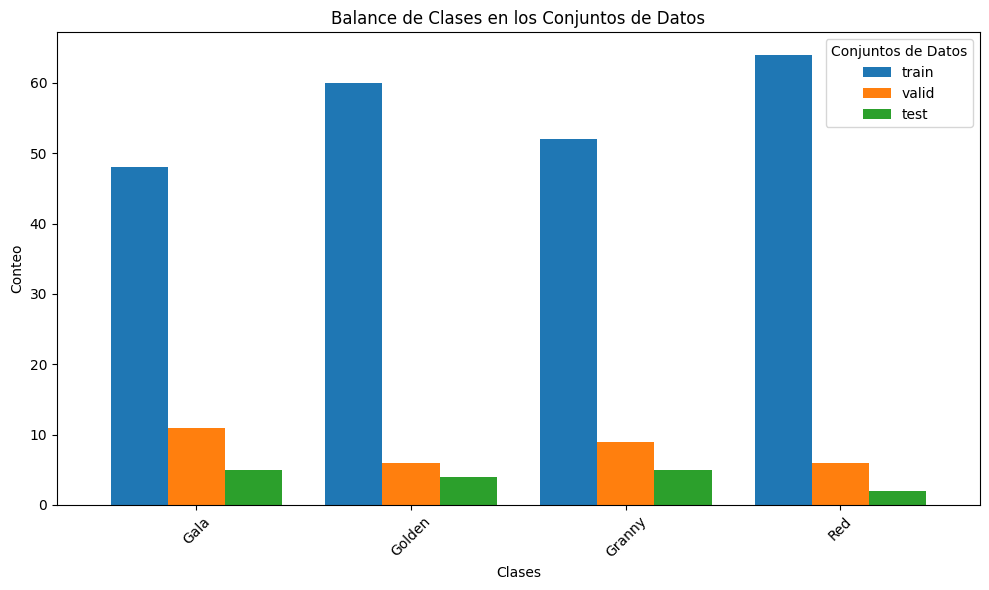

        train  valid  test
Gala       48     11     5
Golden     60      6     4
Granny     52      9     5
Red        64      6     2


In [3]:
class_balance_df = analyze_class_balance(r'/content/Manzanas-2/data.yaml')
plot_class_balance(class_balance_df)
print(class_balance_df)

# Instalación de Ultralytics

In [4]:
%pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [5]:
import yaml

# Definir el contenido del archivo YAML
data = {
    'names': ['Gala', 'Golden', 'Granny', 'Red'],
    'nc': 4,
    'test': '/content/Manzanas-2/test',
    'train': '/content/Manzanas-2/train',
    'val': '/content/Manzanas-2/valid'
}

path = r'/content/Manzanas-2/data.yaml'

# Escribir el contenido en un archivo YAML
with open(path , 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("Archivo data.yaml creado exitosamente.")


Archivo data.yaml creado exitosamente.


Descripción de la Arquitectura: https://docs.ultralytics.com/yolov5/tutorials/architecture_description/

In [ ]:
remove_directory_if_exists(r'D:\Diplomado-IA\Modulo_5_extendido\Proyecto_1\runs')

In [6]:
from ultralytics import YOLO

model = YOLO("yolov5mu.pt")  # Entrenamiento con pesos pre-entrenados

#model = YOLO("yolov5s.yaml")  Entrenamiento desde cero, revisar los modelos en https://docs.ultralytics.com/models/yolov5/#supported-tasks-and-modes
# NOTA: Yolov5su  has moved towards an anchor-free, objectness-free approach. Sin embargo los detalles arquitectonicos son no cambian, solo el cabezal de detección

model.train(
    data=r"/content/Manzanas-2/data.yaml",
    task="detect",
    mode='train',
    epochs=50,          # Número de épocas de entrenamiento
    patience=100,       # Paciencia para el early stopping
    batch=16,           # Tamaño del batch
    imgsz=640,          # Tamaño de la imagen
    save=True,          # Guardar el modelo después de entrenar
    cache=False,        # Usar caché de datos
    device=None,        # Dispositivo para el entrenamiento (None para auto-detectar)
    workers=8,          # Número de workers para el data loading
    pretrained=True,    # Usar pesos pre-entrenados
    optimizer='auto',   # Optimizador
    verbose=True,       # Imprimir información durante el entrenamiento
    seed=0,             # Semilla para la reproducibilidad
    deterministic=True, # Asegurar entrenamiento determinista
    amp=True,           # Mixed precision training
    val=True,           # Validar después de cada época
    split='val',        # División para validación
    iou=0.7,            # Umbral de IoU
    max_det=300,        # Máximo número de detecciones por imagen
    lr0=0.01,           # Tasa de aprendizaje inicial
    lrf=0.01,           # Factor de reducción de la tasa de aprendizaje
    momentum=0.937,     # Momento para SGD
    weight_decay=0.0005,# Decaimiento de peso
    warmup_epochs=3.0,  # Número de épocas de calentamiento
    warmup_momentum=0.8,# Momento durante el calentamiento
    warmup_bias_lr=0.1, # Tasa de aprendizaje para el sesgo durante el calentamiento
    box=7.5,            # Pérdida de la caja
    cls=0.5,            # Pérdida de la clase
    dfl=1.5,            # Pérdida de distribución focal
    mosaic=1.0,         # Probabilidad de aplicar la técnica de mosaic
    auto_augment='randaugment', # Tipo de aumento automático
    erasing=0.4,        # Probabilidad de borrado aleatorio
    save_dir='runs/detect/train', # Directorio para guardar los resultados
    name = 'exp-YOLOv5mu'
)


100%|██████████| 48.2M/48.2M [00:00<00:00, 431MB/s]


Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5mu.pt, data=/content/Manzanas-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=exp-YOLOv5mu, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

100%|██████████| 755k/755k [00:00<00:00, 120MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      5280  ultralytics.nn.modules.conv.Conv             [3, 48, 6, 2, 2]              
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2     65280  ultralytics.nn.modules.block.C3              [96, 96, 2]                   
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    444672  ultralytics.nn.modules.block.C3              [192, 192, 4]                 
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  6   2512896  ultralytics.nn.modules.block.C3              [384, 384, 6]                 
  7                  -1  1   2655744  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 301MB/s]


AMP: checks passed ✅


train: Scanning /content/Manzanas-2/train/labels... 224 images, 0 backgrounds, 0 corrupt: 100%|██████████| 224/224 [00:00<00:00, 1363.37it/s]

train: New cache created: /content/Manzanas-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Manzanas-2/valid/labels... 32 images, 0 backgrounds, 0 corrupt: 100%|██████████| 32/32 [00:00<00:00, 384.42it/s]

val: New cache created: /content/Manzanas-2/valid/labels.cache


Plotting labels to runs/detect/exp-YOLOv5mu/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/exp-YOLOv5mu
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.09G      1.138      3.009      1.467         38        640: 100%|██████████| 14/14 [00:10<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]

                   all         32         32      0.698      0.602      0.722      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.96G     0.9209      1.349      1.199         34        640: 100%|██████████| 14/14 [00:06<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         32         32      0.821          1      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.03G     0.9169      1.124      1.228         32        640: 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         32         32      0.751          1      0.995      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.02G     0.9753      1.032      1.221         31        640: 100%|██████████| 14/14 [00:06<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         32         32      0.625      0.496      0.589      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.02G     0.9139      0.993      1.199         42        640: 100%|██████████| 14/14 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         32         32      0.458      0.417      0.198      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.02G     0.9232     0.8436      1.191         32        640: 100%|██████████| 14/14 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         32         32      0.345      0.866      0.592      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.95G     0.9168     0.7971      1.184         33        640: 100%|██████████| 14/14 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         32         32      0.275      0.689      0.446       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.03G     0.9442      0.864      1.212         27        640: 100%|██████████| 14/14 [00:07<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         32         32      0.522      0.591      0.486      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.94G     0.9848     0.8621      1.215         32        640: 100%|██████████| 14/14 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         32         32      0.461      0.958      0.541      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.02G     0.9083     0.8092       1.19         33        640: 100%|██████████| 14/14 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         32         32      0.672      0.347      0.503      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.95G     0.9609     0.7638      1.187         39        640: 100%|██████████| 14/14 [00:06<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         32         32      0.661      0.644      0.801      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.02G      0.975     0.7454      1.235         39        640: 100%|██████████| 14/14 [00:07<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         32         32      0.619       0.75      0.748      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.95G     0.8738     0.6127      1.162         33        640: 100%|██████████| 14/14 [00:06<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         32         32       0.74      0.875      0.885      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.02G     0.9106     0.6611      1.165         32        640: 100%|██████████| 14/14 [00:07<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         32         32      0.947      0.896      0.995      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.95G     0.8594      0.667       1.16         23        640: 100%|██████████| 14/14 [00:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         32         32      0.782      0.463      0.554      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         7G     0.8473     0.5844      1.137         34        640: 100%|██████████| 14/14 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         32         32      0.718      0.853      0.914      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.95G     0.8919     0.6927      1.164         35        640: 100%|██████████| 14/14 [00:06<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         32         32      0.932       0.92      0.984       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         7G     0.8521      0.618      1.149         37        640: 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         32         32      0.949          1      0.995      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.95G     0.8542     0.5691      1.157         32        640: 100%|██████████| 14/14 [00:06<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         32         32      0.823      0.905      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.03G     0.8663     0.5763      1.144         33        640: 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         32         32      0.979          1      0.995       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.95G      0.819     0.5813      1.118         26        640: 100%|██████████| 14/14 [00:06<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         32         32      0.989          1      0.995      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.01G     0.8374     0.5613      1.133         32        640: 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         32         32      0.983          1      0.995      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.95G     0.8528     0.5838      1.125         34        640: 100%|██████████| 14/14 [00:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         32         32      0.977      0.988      0.995      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.01G     0.8573      0.553      1.128         36        640: 100%|██████████| 14/14 [00:07<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         32         32      0.978          1      0.995      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.95G     0.8087      0.567      1.135         41        640: 100%|██████████| 14/14 [00:06<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         32         32      0.986          1      0.995      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.02G     0.7884     0.5018      1.102         32        640: 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         32         32      0.853      0.993      0.995      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.95G      0.766     0.4881       1.07         46        640: 100%|██████████| 14/14 [00:06<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         32         32      0.847      0.899      0.995      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.01G     0.7992      0.498      1.122         31        640: 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         32         32      0.967      0.994      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.95G     0.7763     0.4884      1.092         34        640: 100%|██████████| 14/14 [00:06<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         32         32       0.99          1      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.01G     0.7996     0.4711       1.11         30        640: 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         32         32      0.986          1      0.995      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.95G      0.785     0.4927      1.125         30        640: 100%|██████████| 14/14 [00:06<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         32         32      0.987          1      0.995      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.01G     0.7703     0.4542      1.086         38        640: 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         32         32      0.988          1      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.95G     0.7845      0.482      1.109         26        640: 100%|██████████| 14/14 [00:06<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         32         32      0.979      0.931      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.02G     0.7786     0.4817      1.095         28        640: 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         32         32       0.99          1      0.995      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.95G     0.8028     0.4597      1.114         30        640: 100%|██████████| 14/14 [00:06<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         32         32      0.989          1      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.03G     0.7132     0.4127      1.067         36        640: 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         32         32       0.99          1      0.995      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.95G      0.739     0.4528      1.077         39        640: 100%|██████████| 14/14 [00:06<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         32         32      0.957      0.995      0.995       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.01G       0.74     0.4531      1.083         44        640: 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         32         32      0.948      0.919      0.974      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.95G     0.7136     0.4248      1.056         38        640: 100%|██████████| 14/14 [00:06<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         32         32      0.904          1      0.995      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.01G     0.7243     0.4371       1.06         37        640: 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         32         32      0.914      0.981      0.989      0.893


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.95G     0.6236     0.3689      1.091         16        640: 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         32         32      0.973      0.956      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.01G     0.6297     0.3878      1.053         16        640: 100%|██████████| 14/14 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         32         32       0.99          1      0.995      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.95G     0.6181     0.3529      1.058         16        640: 100%|██████████| 14/14 [00:06<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         32         32       0.99          1      0.995      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.02G     0.6109     0.3295      1.043         16        640: 100%|██████████| 14/14 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         32         32       0.99          1      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.95G     0.5913     0.3266      1.081         16        640: 100%|██████████| 14/14 [00:06<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         32         32      0.986          1      0.995        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.01G     0.5903     0.3353       1.04         16        640: 100%|██████████| 14/14 [00:07<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         32         32      0.991          1      0.995      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.95G     0.5814     0.3106       1.02         16        640: 100%|██████████| 14/14 [00:06<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         32         32       0.99          1      0.995      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.01G     0.5817     0.2995      1.052         16        640: 100%|██████████| 14/14 [00:07<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         32         32      0.985          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.95G      0.559     0.2935      1.007         16        640: 100%|██████████| 14/14 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         32         32       0.98          1      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.01G     0.5759     0.3113      1.033         16        640: 100%|██████████| 14/14 [00:07<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         32         32       0.98          1      0.995      0.906



50 epochs completed in 0.130 hours.
Optimizer stripped from runs/detect/exp-YOLOv5mu/weights/last.pt, 50.5MB
Optimizer stripped from runs/detect/exp-YOLOv5mu/weights/best.pt, 50.5MB

Validating runs/detect/exp-YOLOv5mu/weights/best.pt...
Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5m summary (fused): 248 layers, 25,047,532 parameters, 0 gradients, 64.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


                   all         32         32      0.985          1      0.995       0.92
                  Gala         11         11      0.981          1      0.995      0.896
                Golden          6          6      0.976          1      0.995      0.975
                Granny          9          9      0.983          1      0.995      0.924
                   Red          6          6          1          1      0.995      0.886
Speed: 0.3ms preprocess, 10.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/exp-YOLOv5mu


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x77fb92ca5a50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

## Evaluación del modelo entrenado

https://docs.ultralytics.com/modes/val/

In [7]:
metrics = model.val(imgsz = 640, split = 'test', plots = True, name = 'Metrics-test-exp-YOLOV5mu')

Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5m summary (fused): 248 layers, 25,047,532 parameters, 0 gradients, 64.0 GFLOPs


val: Scanning /content/Manzanas-2/test/labels... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<00:00, 577.59it/s]

val: New cache created: /content/Manzanas-2/test/labels.cache



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


                   all         16         16      0.989          1      0.995      0.952
                  Gala          5          5      0.986          1      0.995      0.941
                Golden          4          4      0.985          1      0.995      0.956
                Granny          5          5      0.985          1      0.995      0.953
                   Red          2          2          1          1      0.995      0.958
Speed: 0.3ms preprocess, 36.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/Metrics-test-exp-YOLOV5mu


In [8]:
metrics = model.val(imgsz = 640, split = 'val', plots = True, name = 'Metrics-val-YOLOV5mu')

Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Manzanas-2/valid/labels.cache... 32 images, 0 backgrounds, 0 corrupt: 100%|██████████| 32/32 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]


                   all         32         32      0.985          1      0.995       0.92
                  Gala         11         11       0.98          1      0.995      0.896
                Golden          6          6      0.976          1      0.995      0.975
                Granny          9          9      0.983          1      0.995      0.924
                   Red          6          6          1          1      0.995      0.886
Speed: 0.3ms preprocess, 20.2ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/Metrics-val-YOLOV5mu


In [9]:
metrics = model.val(imgsz = 640, split = 'train', plots = True, name = 'Metrics-train-YOLOV5mu')

Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Manzanas-2/train/labels.cache... 224 images, 0 backgrounds, 0 corrupt: 100%|██████████| 224/224 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.71it/s]


                   all        224        224      0.998          1      0.995      0.879
                  Gala         48         48      0.998          1      0.995      0.846
                Golden         60         60      0.998          1      0.995      0.886
                Granny         52         52      0.998          1      0.995      0.898
                   Red         64         64      0.999          1      0.995      0.885
Speed: 0.7ms preprocess, 21.2ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/Metrics-train-YOLOV5mu


# Predicciones

In [10]:
from ultralytics import YOLO
model = YOLO(r"/content/runs/detect/exp-YOLOv5mu/weights/best.pt")

In [11]:
model.predict(r"/content/Manzanas-2/valid/images/Golden-s-68-_png.rf.db35d492d2c1c62a238b9636c64a0e7c.jpg", save=True, imgsz=640, conf=0.76)


image 1/1 /content/Manzanas-2/valid/images/Golden-s-68-_png.rf.db35d492d2c1c62a238b9636c64a0e7c.jpg: 640x640 1 Golden, 34.4ms
Speed: 2.7ms preprocess, 34.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Gala', 1: 'Golden', 2: 'Granny', 3: 'Red'}
 obb: None
 orig_img: array([[[140, 142, 136],
         [141, 143, 137],
         [141, 143, 137],
         ...,
         [149, 149, 143],
         [148, 148, 142],
         [148, 148, 142]],
 
        [[139, 141, 135],
         [140, 142, 136],
         [140, 142, 136],
         ...,
         [149, 149, 143],
         [149, 149, 143],
         [148, 148, 142]],
 
        [[139, 141, 135],
         [140, 142, 136],
         [140, 142, 136],
         ...,
         [150, 150, 144],
         [149, 149, 143],
         [149, 149, 143]],
 
        ...,
 
        [[144, 146, 140],
         [144, 146, 140],
         [144, 146, 140],
         ...,
         [147, 147, 141],
         [147, 147, 141],
         [147, 147, 141]],
 
        [[144, 146, 140],
         [144, 146, 140],
         [144, 146, 140]

In [12]:
model.predict(r"/content/Manzanas-2/test/images", save=True, imgsz=640, conf=0.76, save_txt = True, save_conf = False)


image 1/16 /content/Manzanas-2/test/images/Gala-s-136-_png.rf.38b2e65437944cab4c7e63c3ce83c4e7.jpg: 640x640 1 Gala, 32.9ms
image 2/16 /content/Manzanas-2/test/images/Gala-s-144-_png.rf.4849d81551dc2c11226b1a7d54f9d551.jpg: 640x640 1 Gala, 32.9ms
image 3/16 /content/Manzanas-2/test/images/Gala-s-210-_png.rf.6bd561e70b560660ca5efe602226d8d3.jpg: 640x640 1 Gala, 32.8ms
image 4/16 /content/Manzanas-2/test/images/Gala-s-82-_png.rf.aa3771dbd2cd43e5bafcf7e7ac387919.jpg: 640x640 1 Gala, 32.8ms
image 5/16 /content/Manzanas-2/test/images/Gala-s-88-_png.rf.b99a484a1c4b6f024e582f55a3a139b8.jpg: 640x640 1 Gala, 32.7ms
image 6/16 /content/Manzanas-2/test/images/Golden-s-128-_png.rf.0b389ef3f982e7c5a4a1609d8977750d.jpg: 640x640 1 Golden, 22.8ms
image 7/16 /content/Manzanas-2/test/images/Granny-s-16-_png.rf.c82c642934fedfadbebd109df8d6d95b.jpg: 640x640 1 Granny, 21.6ms
image 8/16 /content/Manzanas-2/test/images/Granny-s-168-_png.rf.e527105a9f98100d7dd1d47e21d0af9e.jpg: 640x640 1 Granny, 21.6ms
image 

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Gala', 1: 'Golden', 2: 'Granny', 3: 'Red'}
 obb: None
 orig_img: array([[[143, 146, 144],
         [143, 146, 144],
         [143, 146, 144],
         ...,
         [142, 143, 139],
         [143, 144, 140],
         [143, 144, 140]],
 
        [[143, 146, 144],
         [143, 146, 144],
         [143, 146, 144],
         ...,
         [142, 143, 139],
         [142, 143, 139],
         [143, 144, 140]],
 
        [[143, 146, 144],
         [143, 146, 144],
         [143, 146, 144],
         ...,
         [143, 144, 140],
         [143, 144, 140],
         [143, 144, 140]],
 
        ...,
 
        [[139, 145, 140],
         [139, 145, 140],
         [139, 145, 140],
         ...,
         [145, 148, 139],
         [145, 149, 138],
         [144, 148, 137]],
 
        [[138, 145, 140],
         [138, 145, 140],
         [138, 145, 140]

RESULTADOS

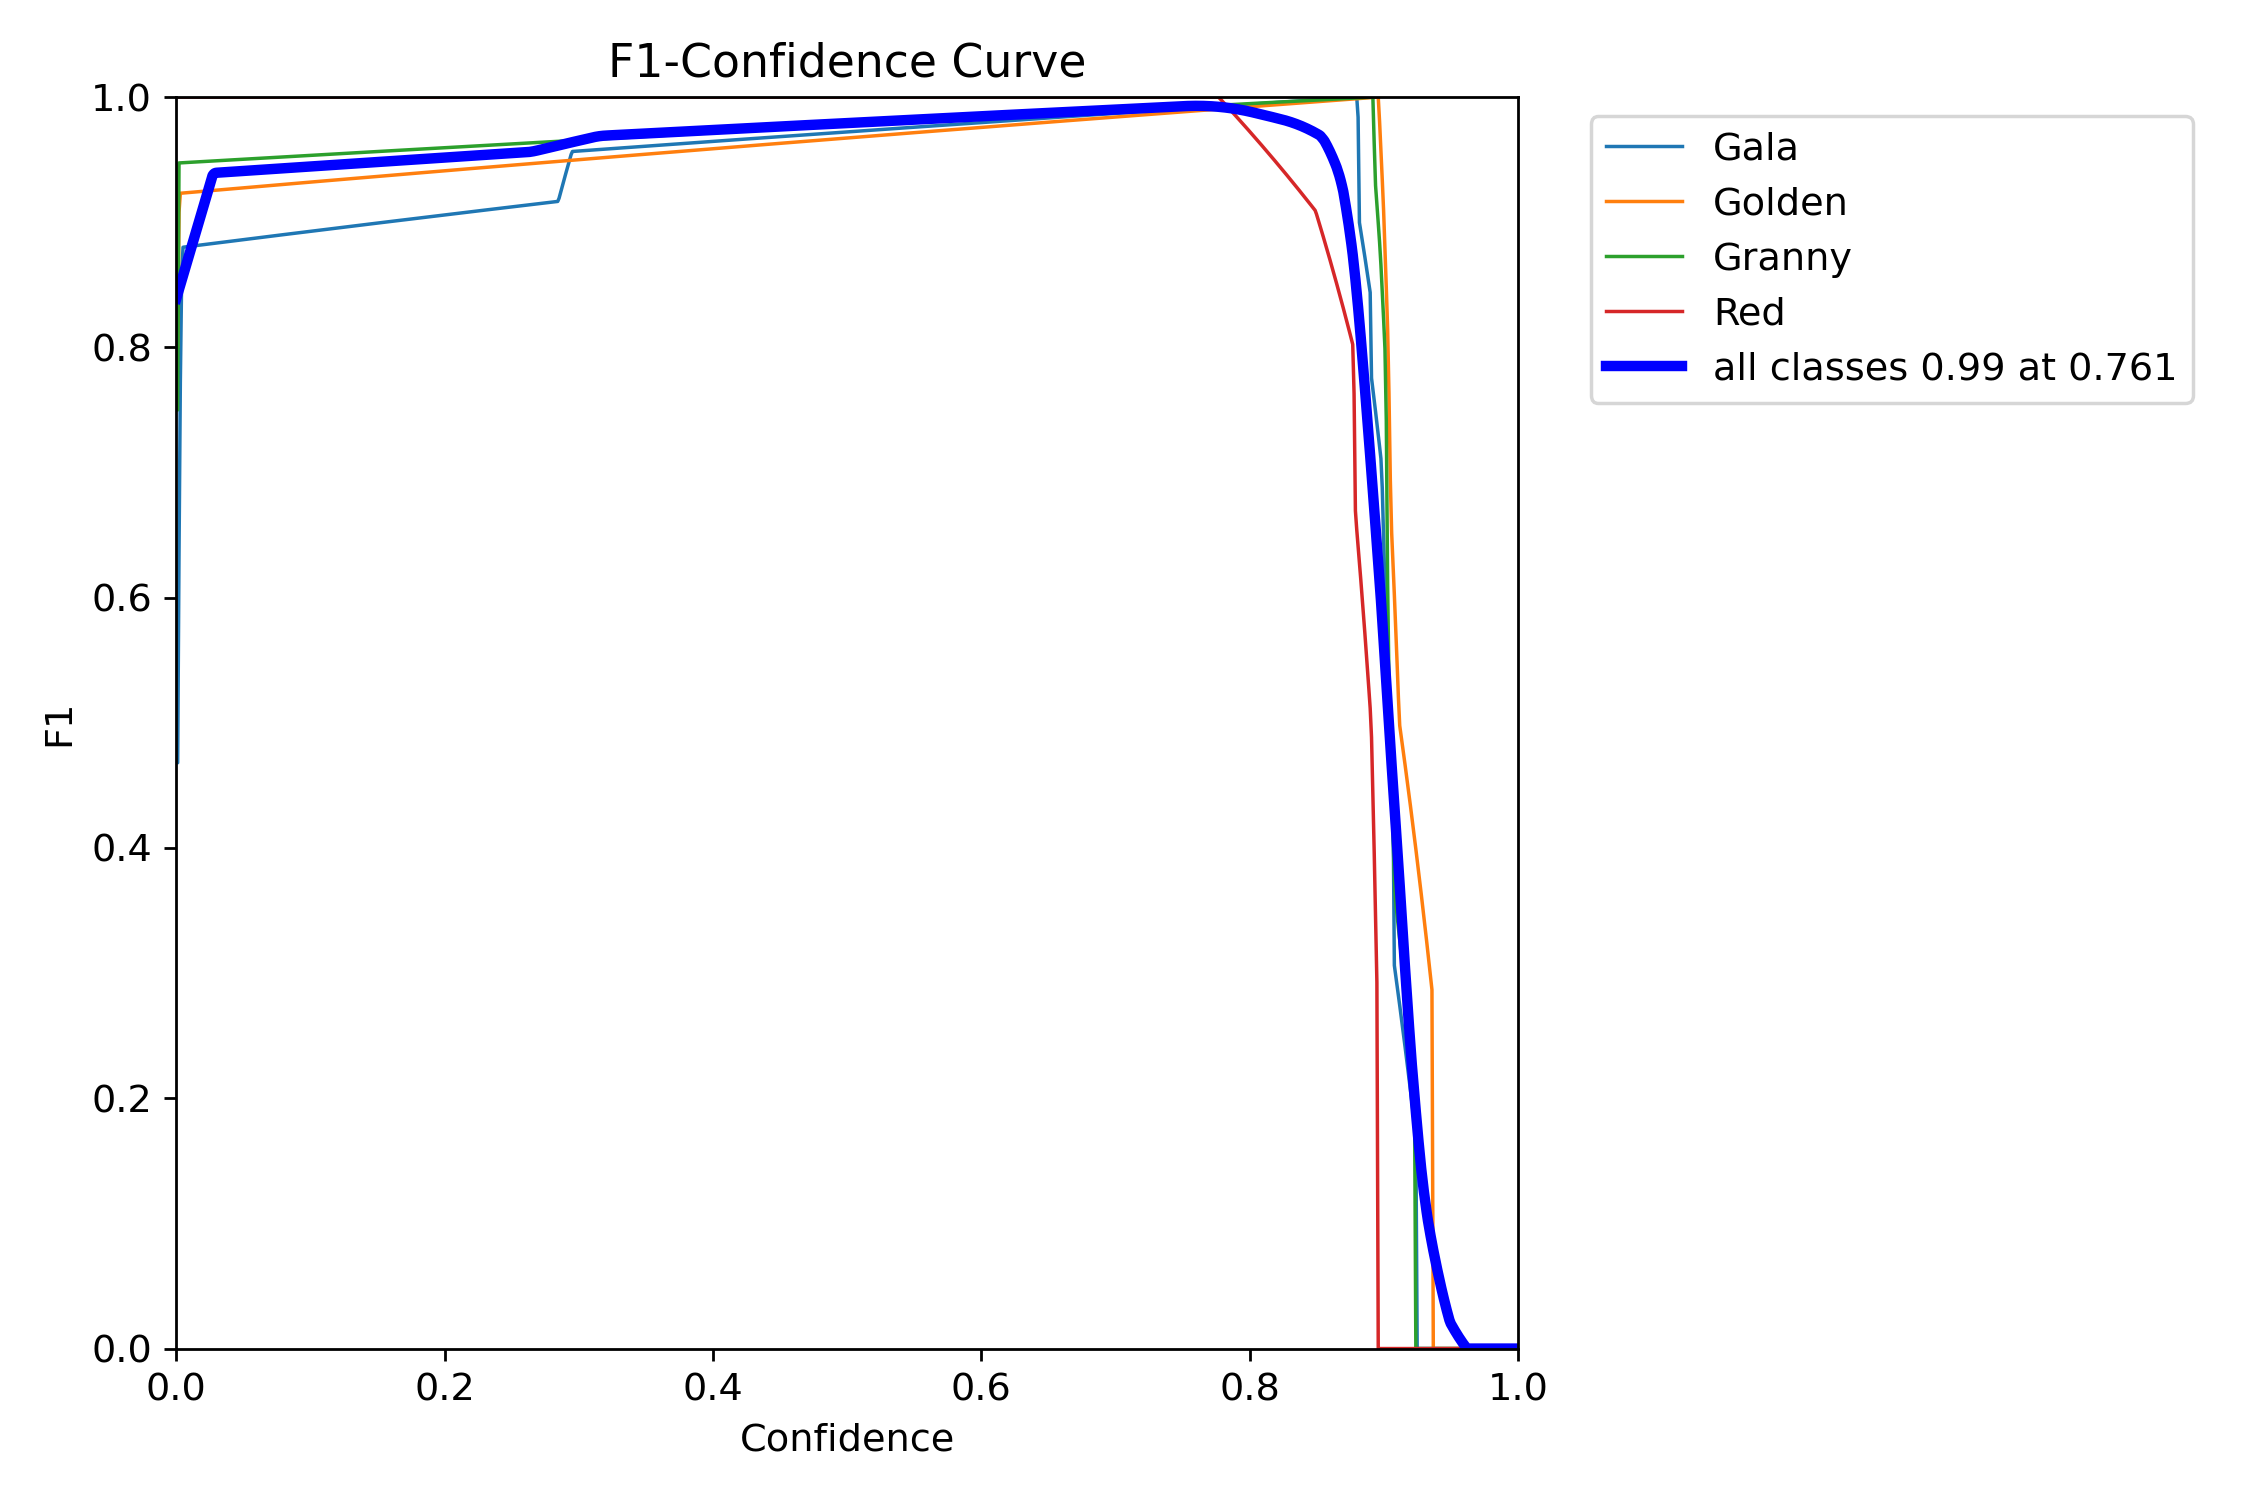

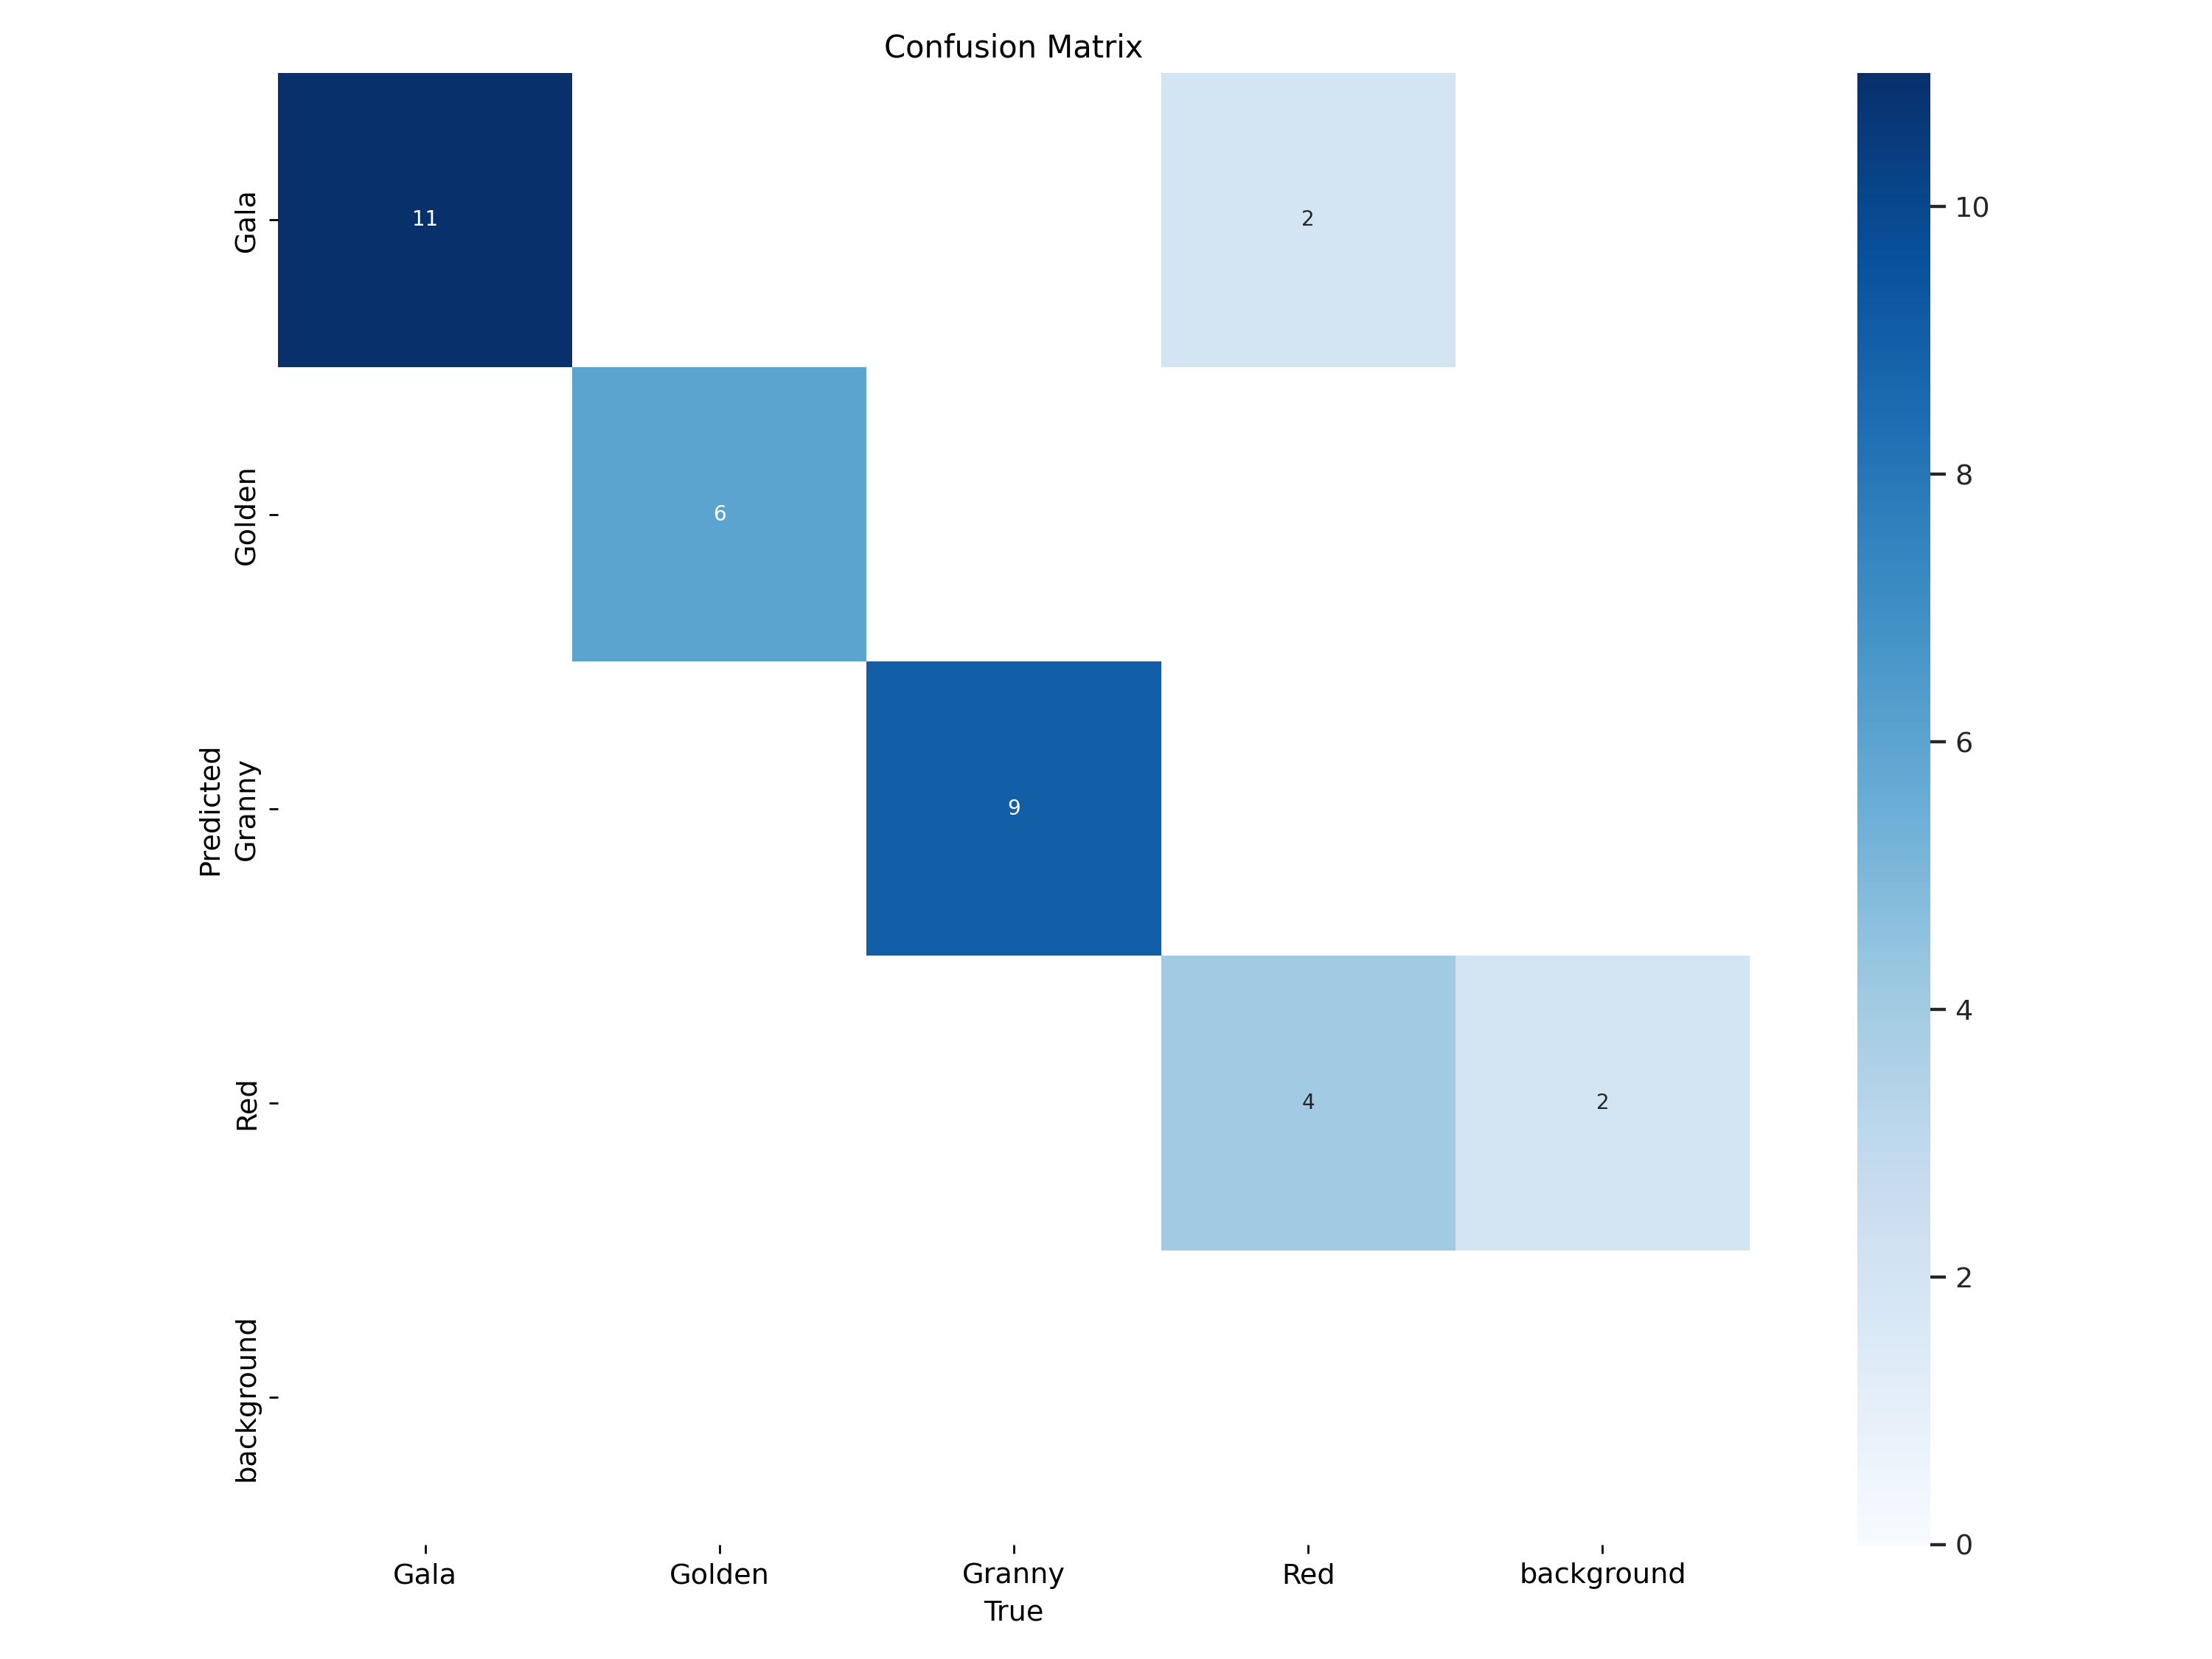

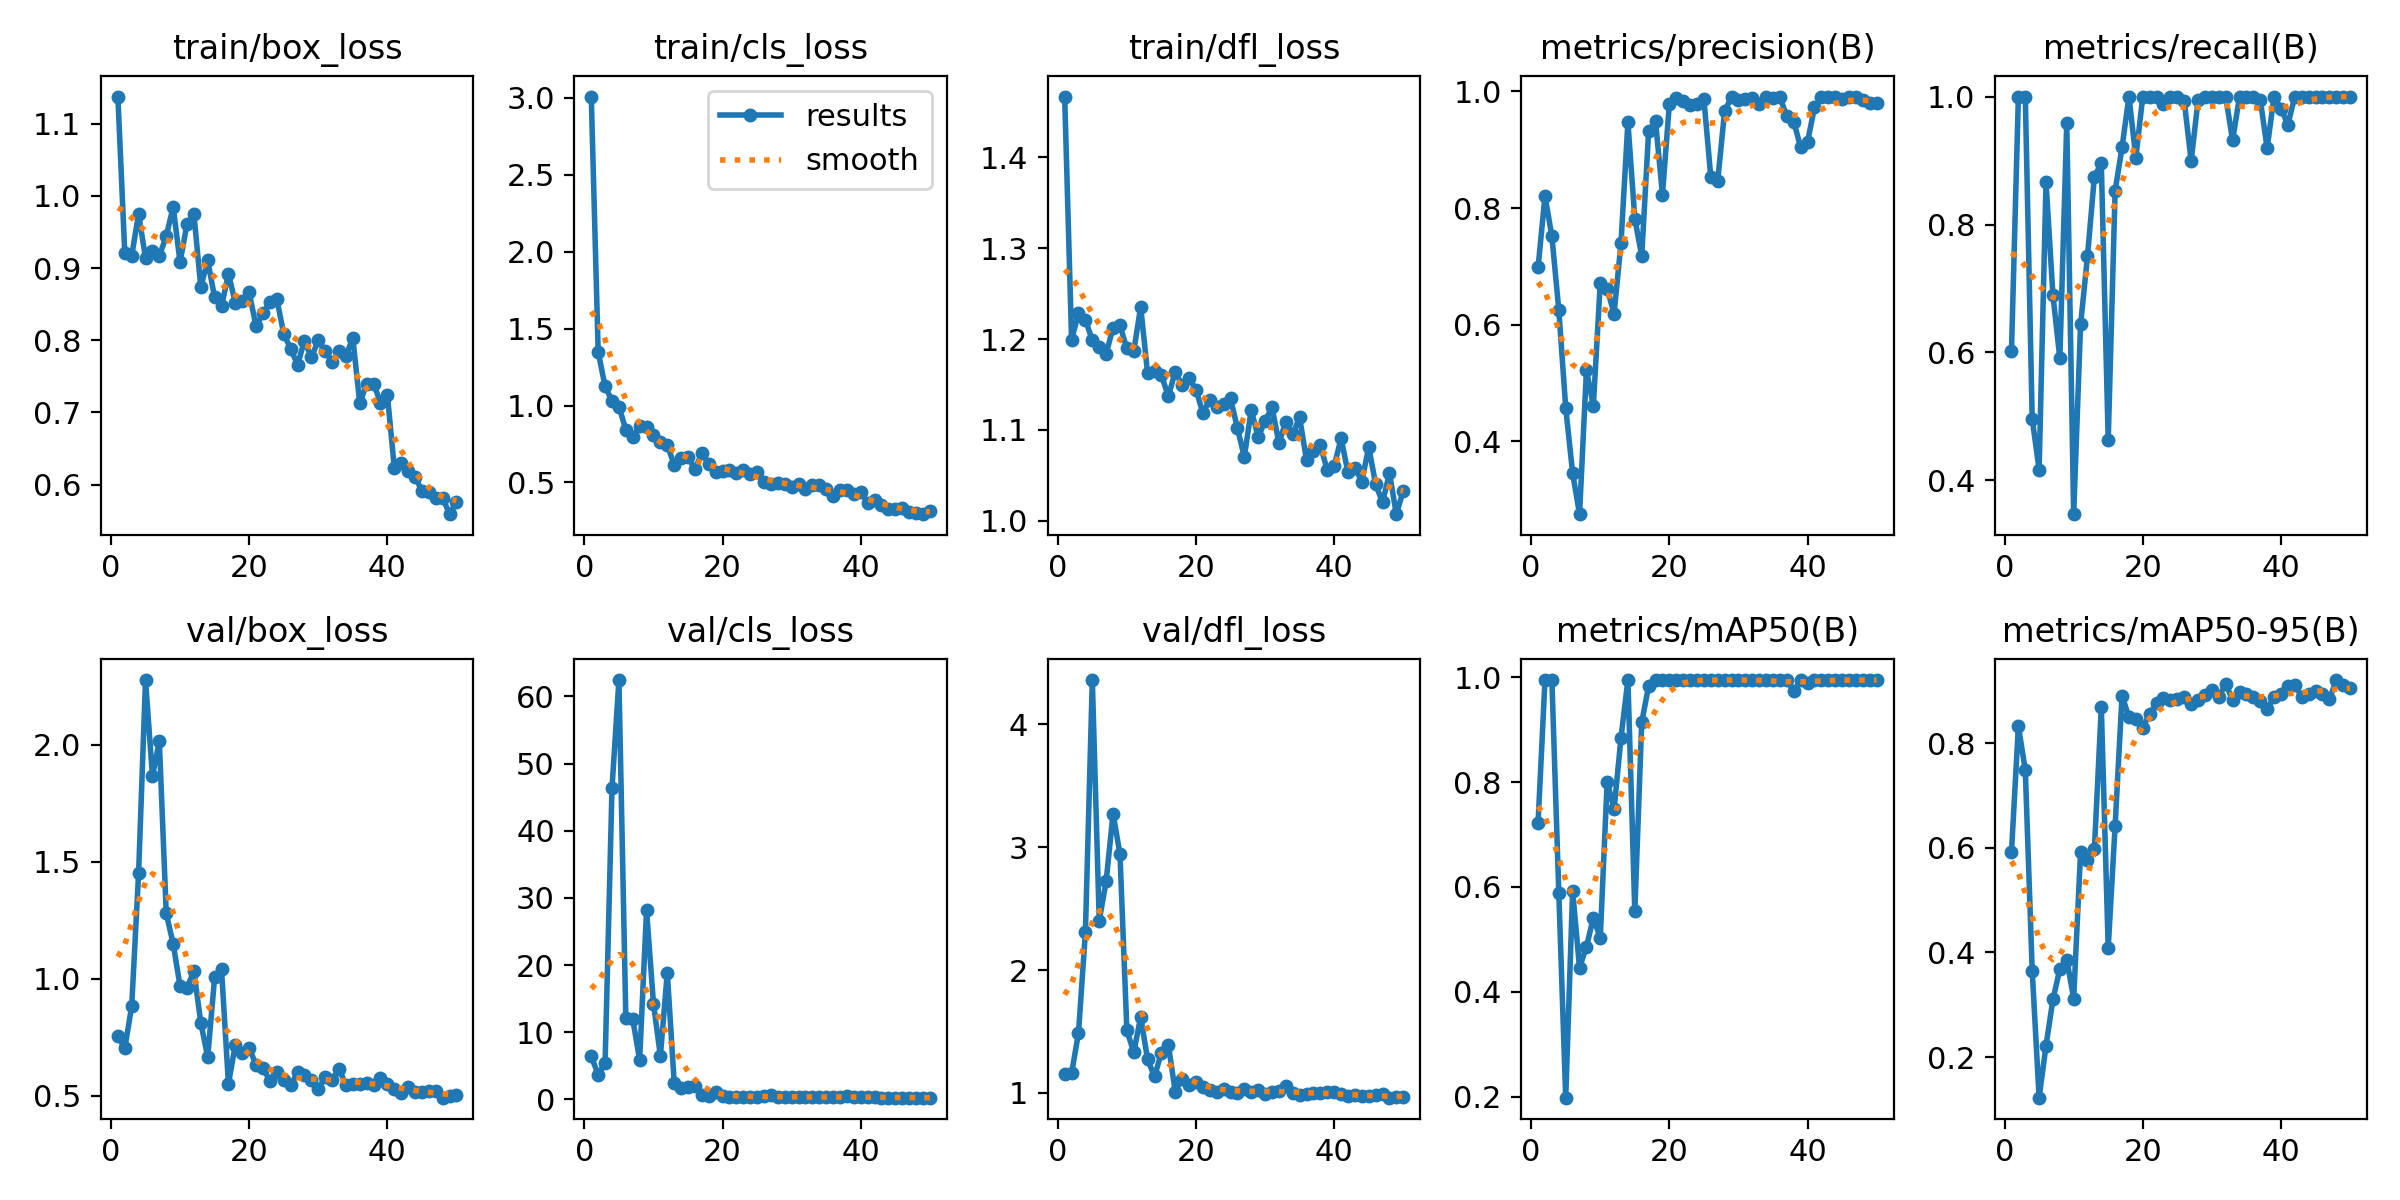

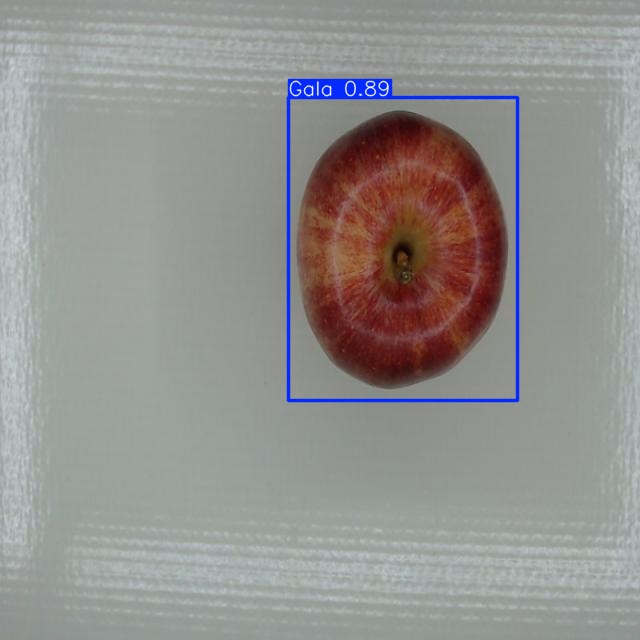

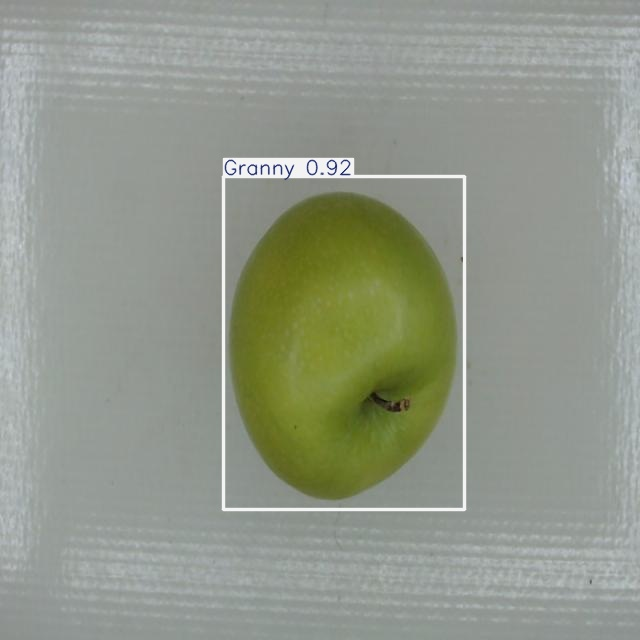

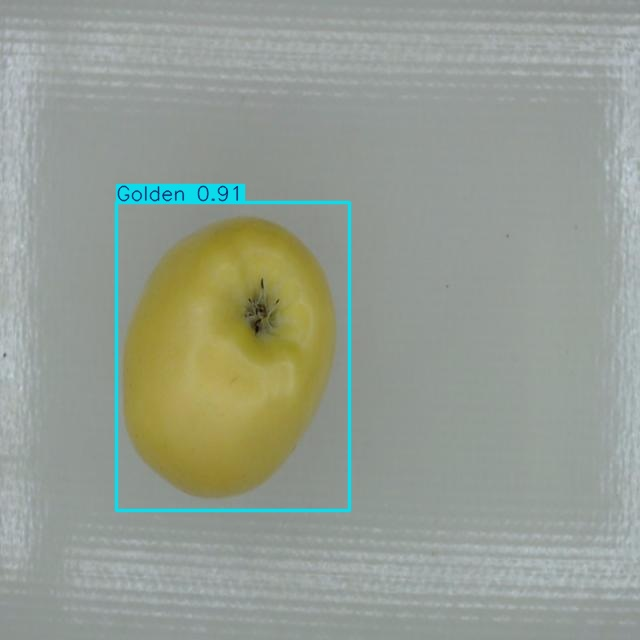

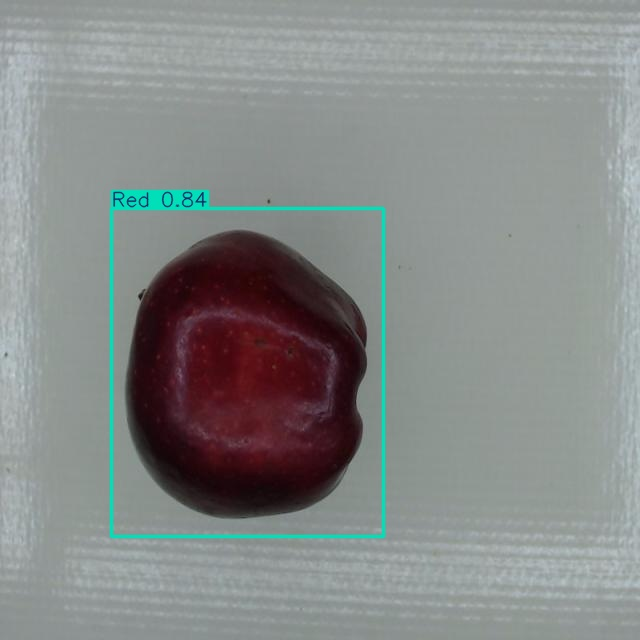